#  La Parallaxe de Mars 

## Etudiants: MICKAEL RAMILISON, FERHAT KUS, JEROME BONACCHI, YAKUMO KUNIMOTO


# Semaine 1

## Ferhat Kus : 
       - recherche de fonctions python pour faire une animation simple.
       - recherche de données de postions de Mars et de la Terre dans le référentiel héliocentrique.


# TEAM CURIOSITY: Parallaxe de Mars (Kus Ferhat)

Etape de compréhension du mouvement Système Soleil, Terre et Mars
Site Internet avec les données sur Mars, les autres planètes du Système solaire et du Soleil: http://www.astronoo.com/fr/articles/positions-des-planetes.html

### Définition: la parallaxe en astronomie

En astronomie, la parallaxe est l’angle sous lequel on pourrait voir une longueur connue, depuis un astre
quelconque.
On distingue généralement deux types de parallaxe : la parallaxe diurne et la parallaxe annuelle.

La parallaxe diurne est utilisée pour les objets du Système solaire : c’est l’angle sous lequel on voit, depuis
l’un d’entre eux, le rayon terrestre.

La parallaxe annuelle est utilisée pour les étoiles (proches) : c’est l’angle sous lequel on voit le demi-grand
axe de l’orbite terrestre depuis une étoile.

### Le mouvement rétrograde de Mars

La rétrogradation ou mouvement rétrograde est le recul (c'est-à-dire un déplacement dans le sens inverse de 
son mouvement naturel) que semble décrire la planète Mars lors de son observation par rapport aux étoiles lointaines.


Il existe deux référentiels pour étudier le mouvement de rotation de Mars dans le système solaire: 
    
       1. Dans le référentiel héliocentrique, Mars, tout comme la Terre, a une trajectoire elliptique 
       (dans le cas de la Terre, cette ellipse est presque un cercle). 
       
       2. Dans le référentiel géocentrique, cependant, la trajectoire de Mars ressemble à une cardioïde.
       Mars se déplace dans une direction, revient sur ses pas (d'où le mot "rétrograde"), puis retourne dans la
       direction initiale.

### Le type de trajectoire de Mars dans le référentiel géocentrique (avec équations).


#### Equation Mathématiques 

Mars décrit dans sa trajectoire autour de la Terre une cardïode (voir l'équation).
https://fr.wikipedia.org/wiki/Courbe_cyclo%C3%AFdale

## Yakumo Kunimoto : 
    - recherche de fonctions python pour faire une animation simple.
    - recherche de caractéristiques orbitales de la Terre et de Mars.

## Exemples

<IPython.core.display.Javascript object>


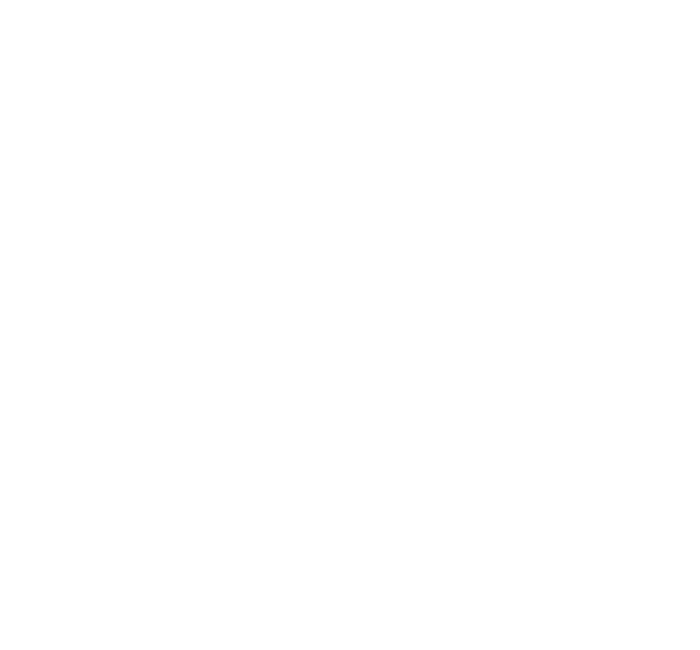

<IPython.core.display.Javascript object>


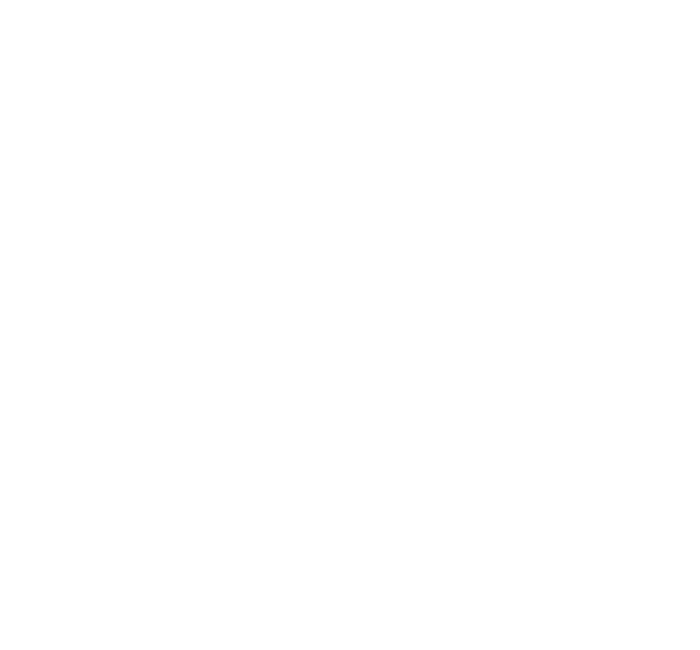

In [8]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation



%matplotlib notebook

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')


    
def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    return patch,



anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=20,
                               blit=True)



plt.show()
plt.scatter([5], [5], s=250, marker=(5,1), color="k")


<IPython.core.display.Javascript object>


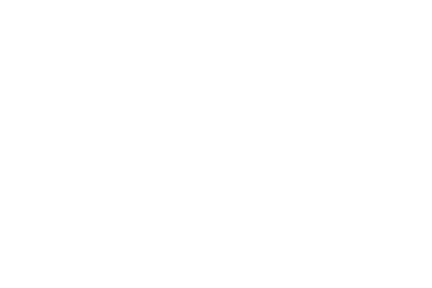

[]

<IPython.core.display.Javascript object>


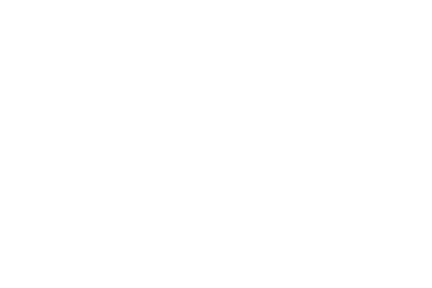

In [9]:
import matplotlib.pyplot as plt



circle = plt.Circle((0, 0), radius=0.75, fc='y')
plt.gca().add_patch(circle)

plt.axis('scaled')
plot()

source:
https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html
https://github.com/zingale/astro_animations/blob/master/solar_system_motion/parallax/parallax.py
https://fiftyexamples.readthedocs.io/en/latest/gravity.html


<IPython.core.display.Javascript object>


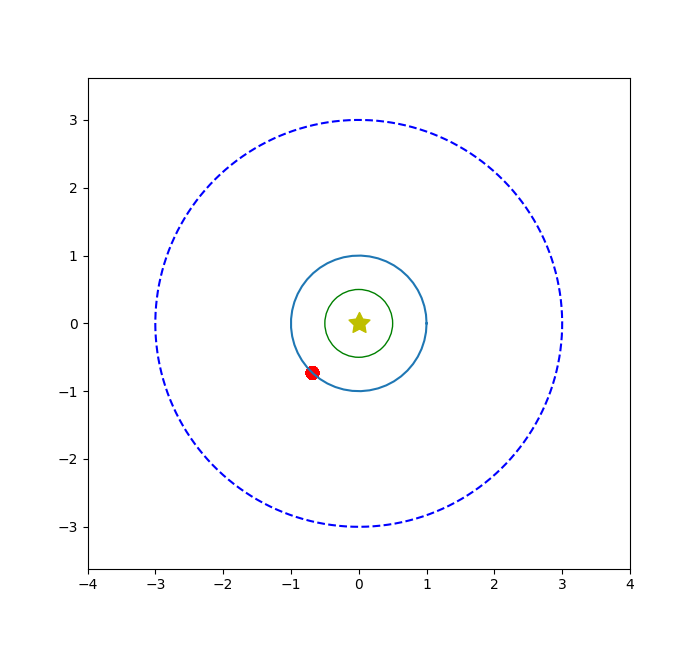

(-4, 4)

In [10]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation


%matplotlib notebook

class ParallaxScene:
    """
    We'll treat the entire collection of the Earth/Sun, foreground
    star, and background star as an object.  The only real thing that we
    need to change from frame to frame is the location of Earth
    """

    def __init__(self):

        # start Earth on the x-axis, on the opposite side of the field of
        # stars we will reference -- we accomplish this through a phase
        self.phi = math.pi
        
        # number of steps per year (make this a number divisible by 4)
        self.nsteps_year = 360   

        # angular velocity (radians per year)
        self.omega = 2.0*math.pi/1.0          

        # semi-major axis of planet Earth
        self.a_E = 3.0       

        # position of Earth over the year
        omega_t = np.arange(self.nsteps_year)*2.0*math.pi/(self.nsteps_year-1)
        self.x_orbit = self.a_E*np.cos(omega_t + self.phi)
        self.y_orbit = self.a_E*np.sin(omega_t + self.phi)

        # foreground star
        self.x_fg = 3.5
        self.y_fg = 0.0


    def draw_sun_and_orbit(self):

        # draw the Sun
        plt.scatter([0], [0], s=250, marker=(5,1), color="y")
        plt.scatter([0], [0], s=200, marker=(5,1), color="y")

        # plot the orbit
        plt.plot(self.x_orbit, self.y_orbit, "b--")
        

        



A=ParallaxScene()


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.1, fc='r')

    
def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 0 + 1 * np.sin(np.radians(i)*1)
    y = 0 + 1 * np.cos(np.radians(i)*1)
    patch.center = (x, y)
    return patch,



anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=5,
                               blit=True)





theta = linspace(0, 2*pi)

x = cos(theta)
y = sin(theta)
plot(x, y)

circle = plt.Circle((0, 0), radius=0.50, fc='none', color="green")
plt.gca().add_patch(circle)

A.draw_sun_and_orbit()
plt.show()
axis("equal")
xlim(-4,4)
ylim(-4,4)




## Comparaison Terre-Mars

---

|                                 | Terre (symbole: ⊕)| Mars  (symbole: ♂)|
| -------------                   |:-------------:    | :---------:        |
| Masse (㎏)                      | $6×10^{24}$       | $6×10^{23}$        |
| demi grand-axe (㎞)             | $1,5×10^8$        | $2,3×10^8$         |
| Exentricité                     | 0,01              | 0,09               |
| vitesse orbitale moyenne (㎞/s) | 30                | 24                 |
| période de révolution (jours)   | 365,25            | 686,96             |
| période synodique (jours)       | -                 | 779,96             |

Masse du Soleil :   $2×10^{30}$ ㎏
    
Période synodique de Mars: c'est le temps mis par Mars pour revenir à la même configuration Terre-Mars-Soleil, c'est-à-dire à la même place dans le ciel par rapport au Soleil, vu de la Terre.

 > [Wiki Terre](https://fr.wikipedia.org/wiki/Terre)       [Wiki Mars](https://fr.wikipedia.org/wiki/Mars_(planète) 

## Mickaël Ramilison :
    - recherche sur les mouvements de la Terre et des planètes dans le système solaire.
    - recherche et rappel des notions vues durant le tutoriel sur Mars.
    - recherche d'exemples d'animation sur le site de la NASA.

# Les Mouvement du système solaire 

source: http://astro.u-strasbg.fr/~bvollmer/COURS/ (cours 3)

## Les mouvements de la Terre

La Terre tourne autour du soleil et sur elle même, c'est ces deux mouvement qui permettent l'altérnance du jour et de la nuit et l'existence des saisons.

La rotation de la Terre sur elle même, autour de l'axe pôle Nord- Pôle Sud, est un mouvement **diurne**.
La Terre effectue un tour complet sur elle même en 23h56 min

Cette rotation se fait **d'Ouest en Est** et entraîne le levé du soleil à l'Est et du coucher vers l'Ouest des astres. Les astres dans notre ciel semblent donc tourner **d'Est en Ouest** et décrivent des cercles autour du pôle céleste. Les cercles sont d'autant plus grand que les astres sont éloignés du pôle.

![alt text](http://a401.idata.over-blog.com/4/15/06/42/T820-CCD/obp1.jpg)

La Terre décrit un tour autour du soleil en 1 an, soit 365,25 jours, dans un plan appelé **écliptique**. Pendant cette révolution annuelle, l'axe de rotation de  la Terre reste parallèle à lui-même mais incliné de 23.5° par rapport au plan écliptique

![alt text](http://www.meridienne.org/images/ecliptique-1.png)

_Schéma du plan écliptique par rapport à l'axe passant par le pôle Nord et le pôle Sud et l'inclinaison de 23°_
_source: google image_

## Le mouvement des planètes autour du Soleil

Les planètes décrivent **des orbites élliptique** autour du soleil, dans le **même sens** et environs dans le **même plan**, ces mouvement sont décrit par les lois de Kepler qui s'applique à toutes les planètes dans le système solaire. 

**Les propriétés physiques des planètes sont conditionnées par leur distance au soleil**

# Mars dans notre ciel étoilé 

sources: http://mars.jpl.nasa.gov/allaboutmars/nightsky/retrograde/

Tout les deux ans environ la position de Mars dans le ciel semble changer de direction et bouge d'Est en Ouest.
Cela est dû au fait que la Terre et Mars orbitent tous les deux autour du soleil.

Les deux planètes sont comparables à une course entre deux voiture sur des couloirs différents, la Terre étant dans le couloir intérieur et la Terre se déplace plus vite que Mars.
Tout les 26 mois, la Terre arrive par derrière pour dépasser Mars. Lorsqu'on dépasse Mars on a l'illusion que la planète revient en arrière 

La trajectoire de Mars dans le ciel dépend de la position de la Terre par rapport à Mars: 

![alt text](http://mars.jpl.nasa.gov/images/mep/allaboutmars/retrograde/2014-2016-mars-retrograde-earth-night-sky-samples.jpg)

_A gauche nous avons la trajectoire de Mars en 2014 et à droite la trajectoire de Mars en 2016._

En effet comme le plan des orbites des deux planète ne sont pas les mêmes la trajectoire de Mars dans le ciel peut varier.

![alt text](http://mars.jpl.nasa.gov/images/mep/allaboutmars/nightsky/earth-mars-tilt_br.gif)

_différence des plans des orbites de la Terre et Mars_

## Jérôme Bonacchi :
    - recherche de caractéristiques orbitales de la Terre et de Mars.
    - recherche sur le mouvement rétrograde.
    - recherche rapide sur la mise en page python pour légender des images ==> aucune solution

# BONACCHI JEROME


## <u>Compréhension du mouvement du Système Soleil, Terre, Mars et idées de représentation</u>


- Centre de masse confondu avec la position du Soleil
- Rotation de la Terre et de Mars autour du Soleil
- Orbite quasi-circulaire mais pas d'approximation
- utilisation de données
- caractéristiques physiques des astres pas prises en compte seulement les caractéristiques orbitales
___
#### Données récupérées sur [fr.wikipedia.org](https://fr.wikipedia.org/wiki/Mars_(plan%C3%A8te) :

- Terre :

    - Demi-grand axe Terre-Soleil : 1.00000 UA
    - Excentricité Terre : 0,016710219
    - Inclinaison Terre : 0.00000°
    - Période de la Terre : 365,256366 j
    - Aphélie : 152097701 km
    - Périhélie : 147098074 km

- Mars :

    - Demi-grand axe Mars-Soleil: 1,52366231 UA 
    - Aphélie de Mars : 1,66599116 UA
    - Périhélie de Mars : 1,38133346 UA
    - Période de révolution : 686,9601 j
    - Période synodique : 779,9643 j
    - Vitesse orbitale moyenne : 24.077 km/s
    - Vitesse orbitale maximale : 26.499 km/s
    - Vitesse orbitale minimale : 21.972 km/s
    - Excentricité Mars :0,09341233
    - Inclinaison sur l'écliptique : 1.85061°
    - Noeud ascendant 49.578°
    - Argument de périhélie : 286,46230°

Pas de ref
    
#### Données récupérées sur [en.wikipedia.org](https://en.wikipedia.org/wiki/Mars) :

- Terre :

 Epoch J2000
 
    - Aphelion 	152,100,000 km (94,500,000 mi)(1.01673 AU) 
    - Perihelion 147,095,000 km (91,401,000 mi)(0.9832687 AU) 
    - Semi-major axis 149,598,023 km (92,955,902 mi)(1.000001018 AU) 
    - Eccentricity 	0.0167086
    - Orbital period 365.256363004 d (1.00001742096 yr)
    - Average orbital speed 29.78 km/s (18.50 mi/s)(107,200 km/h (66,600 mph))
    - Mean anomaly 358.617°
    - Inclination 7.155° to the Sun's equator; 1.57869° to invariable plane; 0.00005° to J2000 ecliptic
    - Longitude of ascending node 11.26064° to J2000 ecliptic
    - Argument of perihelion 114.20783°


- Mars :
    - Masse : 6.4171×1023 kg
  Epoch J2000
  
    - Aphelion 	1.6660 AU
    - Perihelion 	1.3814 AU
    - Semi-major axis 1.523679 AU
    - Eccentricity 	0.0934
    - Orbital period 1.8808 Julian years 686.971 d 668.5991 sols
    - Synodic period 779.96 days 2.135 Julian years
    - Average orbital speed 24.077 km/s
    - Mean anomaly 19.373°
    - Inclination 1.850° to ecliptic 5.65° to Sun's equator 1.67° to invariable plane[1]
    - Longitude of ascending node 49.558°
    - Argument of perihelion 286.502°

Ref : 

- Williams, David R. (1 September 2004). ["Earth Fact Sheet"](https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html). NASA. Retrieved 9 August 2010.
- Allen, Clabon Walter; Cox, Arthur N. (2000). [Allen's Astrophysical](https://books.google.fr/books?id=w8PK2XFLLH8C&pg=PA294&redir_esc=y&hl=fr#v=onepage&q&f=false) Quantities. Springer. p. 294. ISBN 0-387-98746-0. Retrieved 13 March 2011.
- "The MeanPlane (Invariable plane) of the Solar System passing through the barycenter". April 3, 2009. Retrieved April 10, 2009. (produced with Solex 10 written by Aldo Vitagliano).
- Simon, J.L.; Bretagnon, P.; Chapront, J.; Chapront-Touzé, M.; Francou, G.; Laskar, J. (February 1994). "Numerical expressions for precession formulae and mean elements for the Moon and planets". Astronomy and Astrophysics. 282 (2): 663–683. [lien](http://adsabs.harvard.edu/abs/1994A&A...282..663S)
- Konopliv, Alex S.; Asmar, Sami W.; Folkner, William M.; Karatekin, Özgür; Nunes, Daniel C.; et al. (January 2011). "Mars high resolution gravity fields from MRO, Mars seasonal gravity, and other dynamical parameters". Icarus. 211 (1): 401–428. [lien ici](http://adsabs.harvard.edu/abs/2011Icar..211..401K) et [là](http://www.sciencedirect.com/science/article/pii/S0019103510003830)

___
## <u>Mouvement rétrograde</u>

Voir la partie retrograde sur la [page](https://en.wikipedia.org/wiki/Mars) de Mars et la [page](https://en.wikipedia.org/wiki/Apparent_retrograde_motion) du mouvement rétrograde 

![Animation du mouvement rétrograde de Mars issu de wikipdia.org](https://upload.wikimedia.org/wikipedia/commons/7/70/Apparent_retrograde_motion_of_Mars_in_2003.gif "Animation du mouvement rétrograde de Mars issu de wikipdia.org")
___
![Mars oppositions issu de wikipedia](https://upload.wikimedia.org/wikipedia/commons/4/48/Mars_oppositions_2003-2018.png "Mars oppositions issu de wikipedia")

>"As Mars approaches opposition, it begins a period of retrograde motion, which means it will appear to move backwards in a looping motion with respect to the background stars. The duration of this retrograde motion lasts for about 72 days, and Mars reaches its peak luminosity in the middle of this motion."

Ref :

- Zeilik, Michael (2002). Astronomy: the Evolving Universe (9th ed.). Cambridge University Press. p. 14. ISBN 0-521-80090-0.

[Aide pour la mise en page](http://enacit1.epfl.ch/markdown-pandoc/#syntaxe-de-base-du-langage-markdown)

# Semaine 2

## Mickael RAMILISON

Après avoir repris le programme où deux cercle tournaient autour d'une étoile j'ai modifié le programe  en le rendant plus visuel et cohérant, comme par exemple représenter la Terre en Bleu et Mars en rouge./


J'ai aussi aligné deux cercles concentriques de couleur rouge et bleu de manière à modéliser la trajectoire des deux planètes.

Ensuite j'ai mis à l'échelle le modèle représenter par le programme. Pour cela j'ai cherché les dimensions de notre système solaire, la taille des planètes et leurs vitesses de rotation autour du soleil. J'ai ainsi trouvé le site suivant qui répértorie toutes les informations nécessaire pour la mise à l'échelle: 

http://planet-terre.ens-lyon.fr/article/comparer-planetes-satellites-systeme-solaire.xml

Pour cela j'ai d'abord pris la Terre comme valeur étalon. Ainsi j'ai choisi sa taille et sa vitesse arbitrairement et pour un soucis de visibilité du modèle la distance la Terre et le  soleil n'est pas respecté. Après avoir choisi la taille et la vitesse de la Terre j'ai calculé le rapport entre la taille de la Terre et celle de Mars et ainsi j'ai obtenu le vrai rapport de taille entre la Terre et Mars. De même pour la vitesse.



<IPython.core.display.Javascript object>


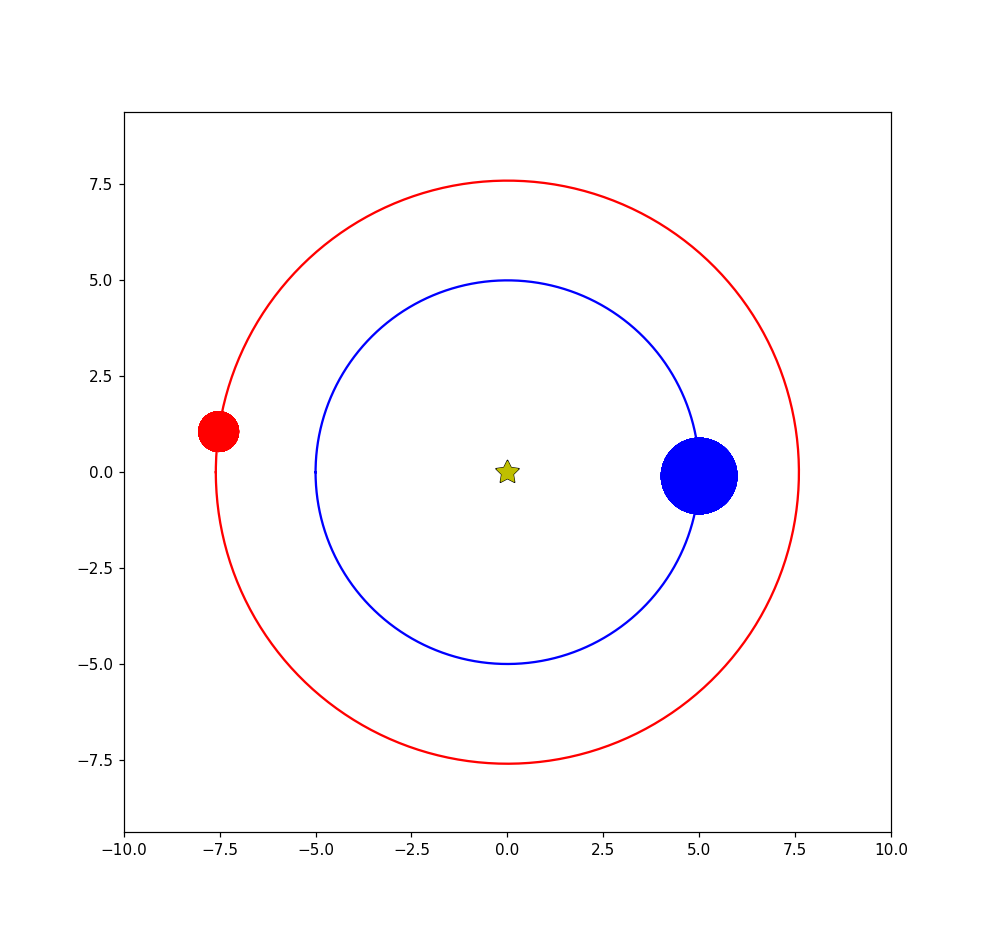

(-10, 10)

In [1]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation


%matplotlib notebook

class ParallaxScene:
    """
    We'll treat the entire collection of the Earth/Sun, foreground
    star, and background star as an object.  The only real thing that we
    need to change from frame to frame is the location of Earth
    """

    def __init__(self):

        # start Earth on the x-axis, on the opposite side of the field of
        # stars we will reference -- we accomplish this through a phase
        self.phi = math.pi
        
        # number of steps per year (make this a number divisible by 4)
        self.nsteps_year = 360   

        # angular velocity (radians per year)
        self.omega = 2.0*math.pi/1.0          

        # semi-major axis of planet Earth
        self.a_E = 5.0       

         # semi-major axis of planet Mars
        self.a_E1 = 7.6
        
        # position of Earth over the year
        omega_t = np.arange(self.nsteps_year)*2.0*math.pi/(self.nsteps_year-1)
        self.x_orbit = self.a_E*np.cos(omega_t + self.phi)
        self.y_orbit = self.a_E*np.sin(omega_t + self.phi)

        # position of Mars over the year
        self.x_orbit1 = self.a_E1*np.cos(omega_t + self.phi)
        self.y_orbit1 = self.a_E1*np.sin(omega_t + self.phi)
        
        # foreground star
        self.x_fg = 1.5
        self.y_fg = 0.0


    def draw_sun_and_orbit(self):

        # draw the Sun
        plt.scatter([0], [0], s=250, marker=(5,1), color="k")
        plt.scatter([0], [0], s=200, marker=(5,1), color="y")

        # plot the orbit
        plt.plot(self.x_orbit, self.y_orbit, "b")
        plt.plot(self.x_orbit1, self.y_orbit1, "r")





A=ParallaxScene()


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(9, 8.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 1.0, fc='b')


    
def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 0 + 5 * np.sin(np.radians(i)*1.617)
    y = 0 + 5 * np.cos(np.radians(i)*1.617)
    patch.center = (x, y)
    return patch,



anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=10,
                               blit=True)

patch2 = plt.Circle((5, -5), 0.5326, fc='r')


    
def init2():
    patch2.center = (5, 5)
    ax.add_patch(patch2)
    return patch2,

def animate2(i):
    v, w = patch2.center
    v = 0 + 7.6 * np.sin(np.radians(i)*1)
    w = 0 + 7.6 * np.cos(np.radians(i)*1)
    patch2.center = (v, w)
    return patch2,



anim2 = animation.FuncAnimation(fig, animate2, 
                               init_func=init2, 
                               frames=360, 
                               interval=10,
                               blit=True)





A.draw_sun_and_orbit()
plt.show()
axis("equal")
xlim(-10,10)
ylim(-10,10)




Il y a cependant un problème qui est que: Quand Mars effectue un tour complet de l'orbite cela réinitialise la position de la Terre.

## Yakumo KUNIMOTO

<IPython.core.display.Javascript object>


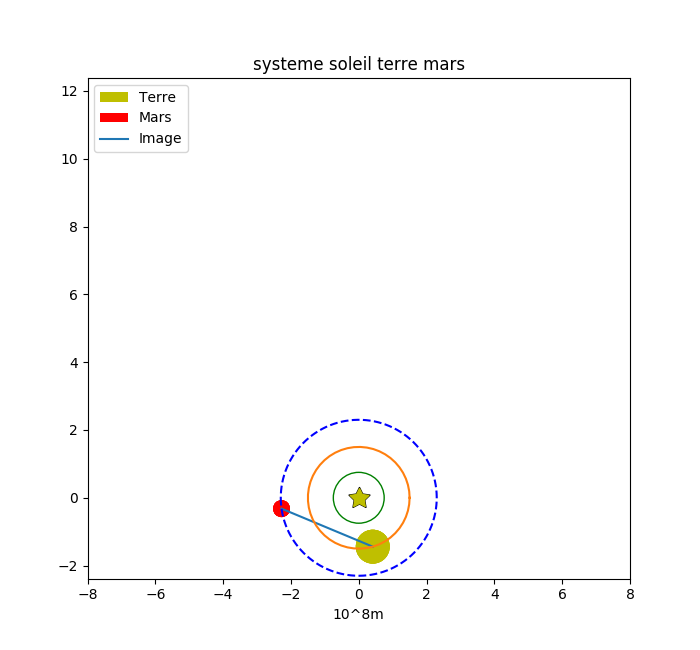

In [2]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

v1=2
v2=1
d1=1.5
d2=2.3
d3=10

class ParallaxScene:
    """
    We'll treat the entire collection of the Earth/Sun, foreground
    star, and background star as an object.  The only real thing that we
    need to change from frame to frame is the location of Earth
    """

    def __init__(self):

        # start Earth on the x-axis, on the opposite side of the field of
        # stars we will reference -- we accomplish this through a phase
        self.phi = math.pi
        
        # number of steps per year (make this a number divisible by 4)
        self.nsteps_year = 360   

        # angular velocity (radians per year)
        self.omega = 2.0*math.pi/1.0          

        # semi-major axis of planet Earth
        self.a_E = d2       

        # position of Earth over the year
        omega_t = np.arange(self.nsteps_year)*2.0*math.pi/(self.nsteps_year-1)
        self.x_orbit = self.a_E*np.cos(omega_t + self.phi)
        self.y_orbit = self.a_E*np.sin(omega_t + self.phi)

        # foreground star
        self.x_fg = 3.5
        self.y_fg = 0.0


    def draw_sun_and_orbit(self):

        # draw the Sun
        plt.scatter([0], [0], s=250, marker=(5,1), color="k")
        plt.scatter([0], [0], s=200, marker=(5,1), color="y")

        # plot the orbit
        plt.plot(self.x_orbit, self.y_orbit, "b--")
        



A=ParallaxScene()


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

patch = plt.Circle((5, -5), 0.5, fc='y', label='Terre')
patch2 = plt.Circle((5, -5), 0.25, fc='r',label='Mars')
line, = plot([],[], label='Image') 
b=12
T=False


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    patch2.center = (5, 5)
    ax.add_patch(patch2)
    line.set_data([],[])
    return patch, patch2, line

def animate(i):
    global b,T
    x, y = patch.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    patch.center = (x, y)
    v, w = patch2.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    patch2.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(d1*d2))<=(math.pi)/2 and T==True:
        if (b-d1 * np.cos(np.radians(i+5)*v1)+d1 * np.sin(np.radians(i+5)*v1)*(d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))/((d2*np.cos(np.radians(i+5)*v2)-d1 * np.cos(np.radians(i+5)*v1))/(d2 * np.sin(np.radians(i+5)*v2)-d1 * np.sin(np.radians(i+5)*v1)))-a<0:
            b=b-0.06
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
    elif math.acos((x*v+w*y)/(d1*d2))>(math.pi)/2:
        line.set_data([x,v],[y,w])
        b=12
        T=True
    return patch, patch2, line





anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=720, 
                               interval=50,
                               blit=True)


theta = linspace(0, 2*pi)

x = d1*cos(theta)
y = d1*sin(theta)
plot(x, y)

circle = plt.Circle((0, 0), radius=0.75, fc='none', color="green")
plt.gca().add_patch(circle)

A.draw_sun_and_orbit()

pylab.title('systeme soleil terre mars')

plt.legend(loc='upper left', handles=[patch, patch2,line])
pylab.xlabel('10^8m')
axis('equal')
xlim(-8,8)
ylim(-5,15)
plt.show()


Problème: cela marche seulement si nous approximons que Mars a une période de révolution de 2 ans, sinon la parallaxe se décale à chaque fois et c'est compliqué.

# Semaine 3

## Mickael RAMILISON

### Méthode de détection de Mars



A l'oeil nu il est possible de voir les planètes. Pour observer des planètes avec un téléscope, un site sans pollution lumineuse n’est pas nécessaire. On peut sans problème en observer quelques une en pleine ville, car les planètes sont suffisamment brillantes pour ne pas être affectées par la luminosité du ciel .Le plus important est de les observer lors de l'absence de turbulence atmosphérique, car les planètes nécessitent un fort grossissement. La moindre turbulence brouille l’image et les fins détails ne sont plus perceptibles.


Pour différencier les planètes des étoiles on remarque que:


 -Les planètes ne scintillent pas comme les étoiles,

 -Elles présentent un disque sensible dans une lunette, tandis qu'une étoile n'est qu'un petit point.

 -De jour en jour elles se déplacent contrairement aux étoiles 
 
 Pour Mars détecter Mars:
 
 La planète est assez lumineuse pour être toujours visible à l'oeil nu avec sa magnitude de 1,80 à -2,80. La magnitude est l'unité de mesure de la luminosité et la brillance d'un astre. Avec un instrument 50 mm on verra le disque de la planète, et avec un objectif de 60 mm (grossicement de 100 fois) on peut voir la calotte polaire. Son évolution est visible à partir d'un instrument de 100 mm. Avec un télescope de 100 à 200 mm on peut noter des variations dans l'intensité générale des taches.
 
source: http://system.solaire.free.fr/observer.htm#haut



## semaine 26/03

### Yakumo

<IPython.core.display.Javascript object>


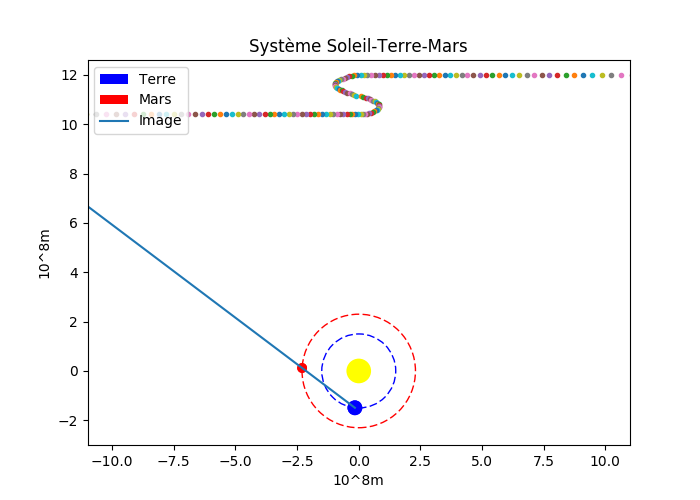

In [7]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
vTerre=2
vMars=1
dTerre=1.5
dMars=2.3
d3=10

#Animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image') 
b=12
T=False

def init():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Terre.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    return Terre, Mars, line

def animate(i):
    global b,T
    x, y = Terre.center
    x = 0 - dTerre * np.sin(np.radians(i)*vTerre)
    y = 0 + dTerre * np.cos(np.radians(i)*vTerre)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 - dMars * np.sin(np.radians(i)*vMars)
    w = 0 + dMars * np.cos(np.radians(i)*vMars)
    Mars.center = (v, w)
    a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
    line.set_data([x,v],[y,w])
    if math.acos((x*v+w*y)/(d1*d2))<=(math.pi)/2 and T==True:
        if (b-dTerre * np.cos(np.radians(i+5)*vTerre)-dTerre * np.sin(np.radians(i+5)*vTerre)*(dMars*np.cos(np.radians(i+5)*vMars)-dTerre * np.cos(np.radians(i+5)*vTerre))/(-dMars * np.sin(np.radians(i+5)*vMars)+dTerre * np.sin(np.radians(i+5)*vTerre)))/((dMars*np.cos(np.radians(i+5)*vMars)-dTerre * np.cos(np.radians(i+5)*vTerre))/(-dMars * np.sin(np.radians(i+5)*vMars)+dTerre * np.sin(np.radians(i+5)*vTerre)))-a>-0.5:
            b=b-0.03
            a=(b-y+x*(w-y)/(v-x))/((w-y)/(v-x))
        line.set_data([x,a],[y,b])
        plt.plot(a,b, marker='.')
    elif math.acos((x*v+w*y)/(d1*d2))>(math.pi)/2:
        b=12
        T=True
    return Terre, Mars, line

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=10,
                               blit=True)


#Cercles
OTerre=plt.Circle((0, 0), dTerre, fc='none', color='b', label='OTerre', linestyle='dashed')
OMars=plt.Circle((0, 0), dMars, fc='none', color='r', label='OMars', linestyle='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='yellow',label='Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)



#Finitions
pylab.title('Système Soleil-Terre-Mars')
plt.legend(loc='upper left', handles=[Terre, Mars ,line])
plt.xlabel('10^8m')
plt.ylabel('10^8m')
plt.axis('equal')
ylim(-3,12.6)
xlim(-11,11)
plt.show()

<IPython.core.display.Javascript object>


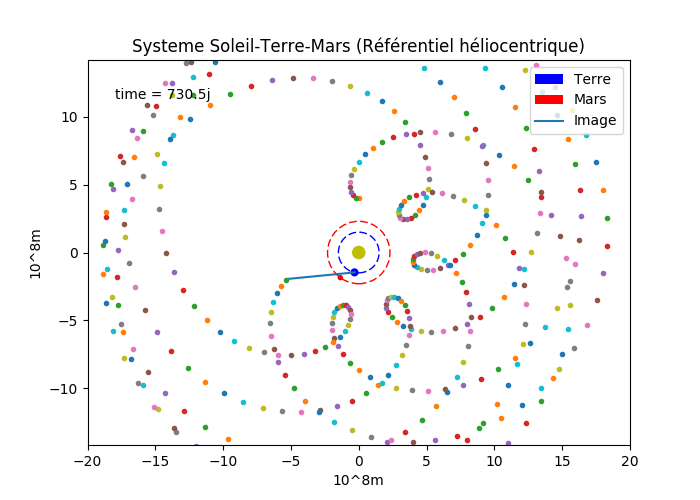

In [4]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=3
v2=3*365.25/686.96
d1=1.5
d2=2.3
d3=5

#Animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7,5)

ax = plt.axes(xlim=(-7, 7), ylim=(-7, 7))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image') 
dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
k=0

def init():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    time_text.set_text('')
    return Terre, Mars, line,time_text

def animate(i):
    global k
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (v, w)
    a=d3*(v-x)
    b=d3*(w-y)
    if i%3==0:
        plt.plot(a,b, marker='.')
    line.set_data([x,a],[y,b])
    k=k+1
    if math.floor(1000*math.sqrt((x-v)**2+(y-w)**2))==800:
        k=1
    time_text.set_text(time_template % (k*dt))
    return Terre, Mars, line, time_text

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=36000000, 
                               interval=100,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed')
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='y',label='Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Systeme Soleil-Terre-Mars (Référentiel héliocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars,line])
pylab.xlabel('10^8m')
pylab.ylabel('10^8m')
axis('equal')
xlim(-20,20)
ylim(-15,15)
plt.show()

On peut constater que tous les 779 jours environ, il y a une nouvelle parrallaxe de Mars: c'est la période synodique!

<IPython.core.display.Javascript object>


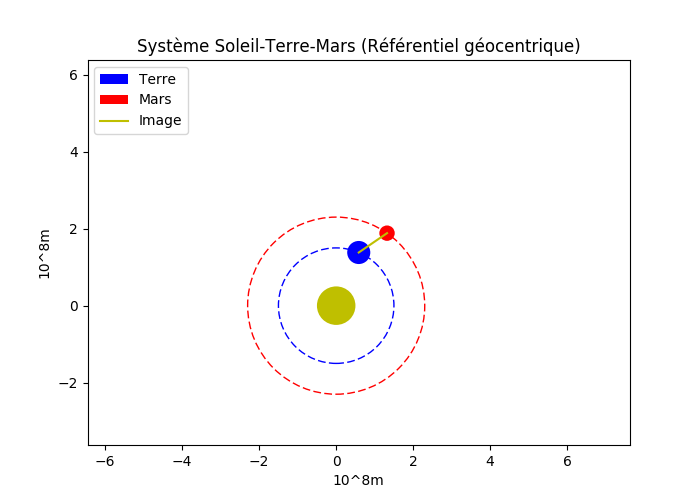

In [5]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=1
v2=365.25/686.96
d1=1.5
d2=2.3
d3=5

#Animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((5, -5), 0.3, fc='b', label='Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
line, = plot([],[], label='Image',c='y') 

def init():
    Terre.center = (5, 5)
    ax.add_patch(Terre)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    return Terre, Mars, line

def animate(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    Terre.center = (x, y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (v, w)
    ax.set_xlim(-5+x,5+x)
    ax.set_ylim(-5+y,5+y)
    line.set_data([x,v],[y,w])
    return Terre, Mars, line

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=36000000, 
                               interval=10,
                               blit=True)

#Cercles
OTerre=plt.Circle((0, 0), d1, fc='none', color='b', label='OTerre', ls='dashed')
OMars=plt.Circle((0, 0), d2, fc='none', color='r', label='OMars',ls='dashed')
Soleil=plt.Circle((0, 0), 0.5, fc='y',label='Soleil')
plt.gca().add_patch(OTerre)
plt.gca().add_patch(OMars)
plt.gca().add_patch(Soleil)

#Finitions
pylab.title('Système Soleil-Terre-Mars (Référentiel géocentrique)')
plt.legend(loc='upper left', handles=[Terre, Mars, line])
pylab.xlabel('10^8m')
pylab.ylabel('10^8m')
axis('equal')
plt.show()

<IPython.core.display.Javascript object>


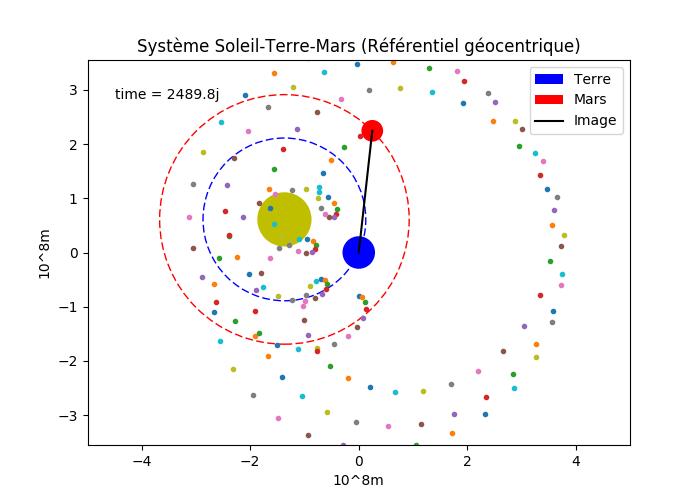

In [6]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation
import math
import pylab

%matplotlib notebook

#Données
v1=3
v2=3*365.25/686.96
d1=1.5
d2=2.3

#Animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 5)

ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))

Terre = plt.Circle((0, 0), 0.3, fc='b', label='Terre')
Mars = plt.Circle((5, -5), 0.2, fc='r',label='Mars')
Soleil=plt.Circle((5, -5), 0.5, fc='y',label='Soleil')
OTerre=plt.Circle((0, 0), radius=d1, fc='none', color="blue", ls='dashed')
OMars=plt.Circle((0, 0), radius=d2, fc='none', color="r", ls='dashed')
line, = plot([],[], label='Image',c='black')

dt = 3*365.25/360
time_template = 'time = %.1fj'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    OTerre.center = (5, 5)
    ax.add_patch(OTerre)
    Soleil.center = (5, 5)
    ax.add_patch(Soleil)
    Mars.center = (5, 5)
    ax.add_patch(Mars)
    line.set_data([],[])
    OMars.center = (5, 5)
    ax.add_patch(OMars)
    Terre.center= (0,0)
    ax.add_patch(Terre)
    time_text.set_text('')
    return Mars, Soleil, OTerre, OMars, line, time_text

def animate(i):
    x, y = Terre.center
    x = 0 + d1 * np.sin(np.radians(i)*v1)
    y = 0 + d1 * np.cos(np.radians(i)*v1)
    OTerre.center = (x, y)
    Soleil.center = (x, y)
    OMars.center = (x,y)
    v, w = Mars.center
    v = 0 + d2 * np.sin(np.radians(i)*v2)
    w = 0 + d2 * np.cos(np.radians(i)*v2)
    Mars.center = (x-v, y-w)
    line.set_data([0,x-v],[0,y-w])
    if i%5==0:
        plt.plot(x-v,y-w, marker='.')
    time_text.set_text(time_template % (i*dt))
    return Mars, Soleil, OTerre, OMars, line, time_text

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=3600, 
                               interval=100,
                               blit=True)

#Finitions
pylab.title('Système Soleil-Terre-Mars (Référentiel géocentrique)')
plt.legend(loc='upper right', handles=[Terre, Mars,line])
pylab.xlabel('10^8m')
pylab.ylabel('10^8m')
axis('equal')
xlim(-5,5)
ylim(-5,5)
plt.show()